<a href="https://colab.research.google.com/github/marciafc/analise-estatistica-e-modelagem-preditiva-de-series-temporais-em-python-notebooks/blob/main/Aula12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><b><font size="5">Data Science Academy</font></b></strong>

<strong><b><font size="5">Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python</font></b></strong>

<strong><b><font size="5">Aula 12 - Forecasting - Previsões Para Séries Temporais - Exponential Smoothing</font></b></strong>

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade em nosso portal: www.datascienceacademy.com.br

Na Aula 11 começamos a estudar Forecasting de séries temporais criando um Modelo Base com Método Naive, que não é necessariamente um modelo, mas sim uma forma de ter uma ideia geral sobre qual seria o comportamento da série no futuro.

A partir de agora estudaremos outros modelos.

Para fazer previsões com séries temporais temos diversos algoritmos divididos nestas categorias principais:


**- Modelos de Regressão de Séries Temporais**

O conceito básico é prever a série temporal de interesse y supondo que ela tenha uma relação linear com outras séries temporais x.

Por exemplo, podemos desejar prever vendas mensais y usando o gasto total com publicidade x como um preditor. Ou podemos prever a demanda diária de eletricidade y usando temperatura x1 e o dia da semana x2 como preditores.

A variável y às vezes também é chamada de variável regressante, dependente ou explicada. As variáveis preditoras x às vezes também são chamados de regressores, variáveis independentes ou explicativas. 


**- Exponential Smoothing**

A "suavização exponencial" foi proposta no final da década de 1950 (Brown, 1959; Holt, 1957; Winters, 1960) e motivou alguns dos métodos de previsão mais bem-sucedidos. As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações "envelhecem". Em outras palavras, quanto mais recente a observação, maior o peso associado. Essa estrutura gera previsões confiáveis rapidamente e para uma ampla gama de séries temporais, o que é uma grande vantagem e de grande importância para muitas aplicações comerciais.


**- Modelos ARIMA (Autoregressive Integrated Moving Average)**

Os modelos ARIMA fornecem outra abordagem para a previsão de séries temporais. A suavização exponencial e os modelos ARIMA são as duas abordagens mais usadas para previsão de séries temporais e fornecem abordagens complementares. Embora os modelos de suavização exponencial sejam baseados em uma descrição da tendência e da sazonalidade nos dados, os modelos ARIMA visam descrever as correlações automáticas nos dados.


**- Modelos de Regressão Dinâmica**

Os modelos de Regressão de Séries Temporais, Exponential Smoothing e ARIMA, permitem a inclusão de informações de observações anteriores de uma série, mas não a inclusão de outras informações que também possam ser relevantes. Por exemplo, os efeitos de feriados, atividade da concorrência, mudanças na lei, economia em geral ou outras variáveis externas podem explicar algumas das variações históricas e levar a previsões mais precisas. 


**- Modelos Hierárquicos ou de Séries Agrupadas**

As séries temporais geralmente podem ser desagregadas naturalmente por vários atributos de interesse. Por exemplo, o número total de bicicletas vendidas por um fabricante de bicicletas pode ser desagregado por tipo de produto, como bicicletas comuns, mountain bikes, bicicletas infantis e híbridos. Cada um deles pode ser desagregado em categorias mais refinadas. Por exemplo, as bicicletas híbridas podem ser divididas em bicicletas urbanas, de transporte, conforto e trekking, e assim por diante. Essas categorias são aninhadas nas categorias de grupos maiores e, portanto, a coleção de séries temporais segue uma estrutura de agregação hierárquica. Portanto, nos referimos a eles como "séries temporais hierárquicas".

Séries temporais hierárquicas geralmente surgem devido a divisões geográficas. Por exemplo, o total de vendas de bicicletas pode ser desagregado por país, depois dentro de cada país por estado, dentro de cada estado por região e assim por diante até o nível da tomada.


**- Métodos Avançados de Previsão de Séries Temporais**

Aqui nós temos técnicas de Combinações, Backcasting, Intervalos Para Agregações e Deep Learning (especialmente com modelos LSTM).

Não estudaremos todos esses modelos neste curso, mas abordaremos alguns, dando ênfase aos modelos ARIMA. Mas agora nesta aula estudaremos o modelo Exponential Smoothing.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [1]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


In [2]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime
#from pandas import Series

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para modelagem preditiva
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib : 3.2.2
IPython    : 5.5.0
sklearn    : 0.0
sys        : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
statsmodels: 0.10.2
pandas     : 1.1.5
numpy      : 1.19.5



## Definição do Problema de Negócio

A HappyMoonVC é uma Venture Capital (VC).

Venture Capital (VC) é um tipo de fundo de investimento focado em capital de crescimento para empresas de médio porte que já possuem carteira de clientes e receita, mas que ainda precisam dar um salto de crescimento. 

VCs investem em empresas iniciantes, Startups e emergentes que foram consideradas com alto potencial de crescimento ou que demonstraram alto crescimento (em termos de número de funcionários, receita anual ou ambos).

A HappyMoonVC está analisando um novo e promissor negócio sugerido por uma Startup, o GoInRail.

O GoInRail é um método de transporte inovador que usa a tecnologia de propulsão a jato para executar um veículo similar a um Drone, mas sobre trilhos (que mantém o Drone carregado com energia elétrica) e transportar pessoas em alta velocidade!

O investimento só fará sentido se o GoInRail conseguir mais de 1 milhão de usuários mensais nos próximos 18 meses.

Nosso trabalho é analisar dados de séries temporais com a demanda de transporte em uma determinada região e prever a demanda pelo GoInRail, que ajude a HappyMoonVC a tomar sua decisão de investimento.

## Conjunto de Dados

Usaremos conjuntos de dados fictícios que mostram a demanda de clientes por transporte em uma determinada região. Para cada dia da semana, foi contabilizado quantas pessoas usaram o sistema de transporte na região. Os dados tem registros dos anos de 2017, 2018 e 2019.

São fornecidos 2 datasets:

- O primeiro possui 3 colunas, com id, data e total de clientes que usaram algum tipo de transporte. Será nossos dados de treino.

- O segundo possui 2 colunas, com id e data para os anos de 2019 e 2020. Será nosso dataset de teste.

In [4]:
# Carrega os dados
dados_treino = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset4.csv")
dados_teste = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset5.csv")

Vamos fazer algumas transformações nos dados para criar o modelo.

In [5]:
# Converte a coluna Datetime para o tipo correto
dados_treino['Datetime'] = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%Y %H:%M')

In [6]:
# Converte a coluna Datetime para o tipo correto
dados_teste['Datetime'] = pd.to_datetime(dados_teste.Datetime, format = '%d-%m-%Y %H:%M')

In [7]:
# Vamos extrair os detalhes da coluna Datetime: ano, mês, dia e hora
for i in (dados_treino, dados_teste):
    i['ano'] = i.Datetime.dt.year
    i['mes'] = i.Datetime.dt.month
    i['dia'] = i.Datetime.dt.day
    i['hora'] = i.Datetime.dt.hour

In [10]:
for i in (dados_treino, dados_teste):
  print(i.Datetime.dt.year)

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
18283    2019
18284    2019
18285    2019
18286    2019
18287    2019
Name: Datetime, Length: 18288, dtype: int64
0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
5107    2020
5108    2020
5109    2020
5110    2020
5111    2020
Name: Datetime, Length: 5112, dtype: int64


In [11]:
dados_treino.shape

(18288, 7)

In [12]:
dados_teste.shape

(5112, 6)

In [13]:
# Precisamos do dia da semana também
dados_treino['dia_semana'] = dados_treino['Datetime'].dt.dayofweek

In [14]:
# Seria bom verificar se o fato de ser final de semana ou não impacta no uso de transporte. 
# Vamos extrair essa informação. Dias da semana iguais a 5 ou 6 são sábado e domingo.

# Criamos uma função, onde marcamos final de semana como 1 e dias úteis como 0
def converteFimSemana(registro):
    if registro.dayofweek == 5 or registro.dayofweek == 6:
        return 1
    else:
        return 0

In [15]:
# Agora aplicamos a função
dados_treino['final_semana'] = dados_treino['Datetime'].apply(converteFimSemana)

In [16]:
# Vejamos como ficou o dataset
dados_treino.head()

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana,final_semana
0,0,2017-08-25 00:00:00,8,2017,8,25,0,4,0
1,1,2017-08-25 01:00:00,2,2017,8,25,1,4,0
2,2,2017-08-25 02:00:00,6,2017,8,25,2,4,0
3,3,2017-08-25 03:00:00,2,2017,8,25,3,4,0
4,4,2017-08-25 04:00:00,2,2017,8,25,4,4,0


In [17]:
# Refinamos os dados para o gráfico da série original

# Definimos o índice do dataset
dados_treino.index = dados_treino['Datetime']

# Removemos a coluna ID, pois ela não é relevante neste caso
features = dados_treino.drop('ID',1)

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dados_treino['Count']

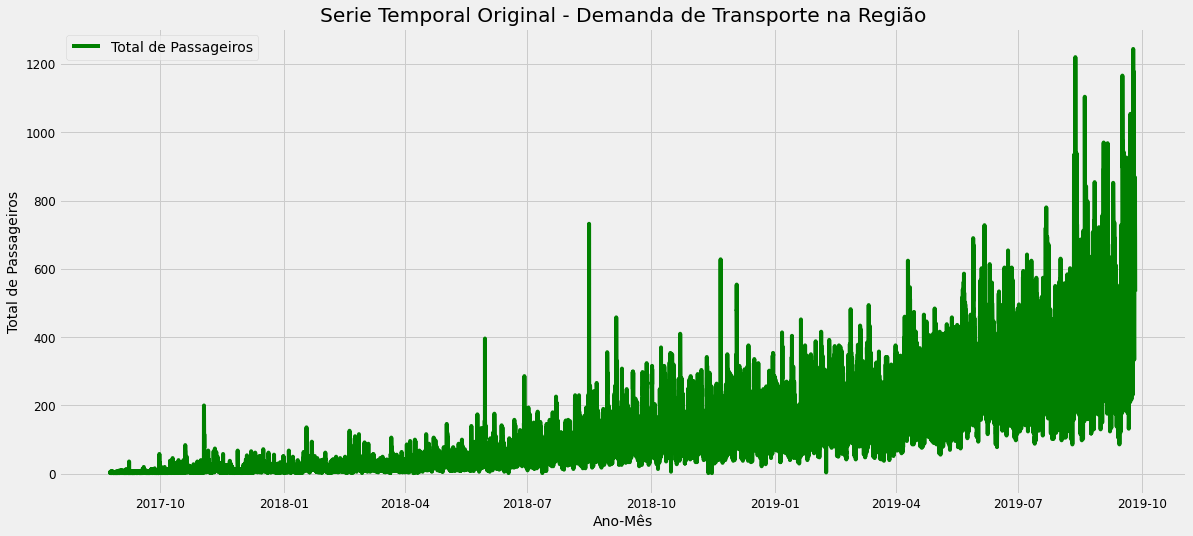

In [18]:
# Plot
plt.title("Serie Temporal Original - Demanda de Transporte na Região")
plt.plot(target, label = "Total de Passageiros", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Passageiros")
plt.legend(loc = "best")

Vamos testar a estacionaridade da série.

In [19]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

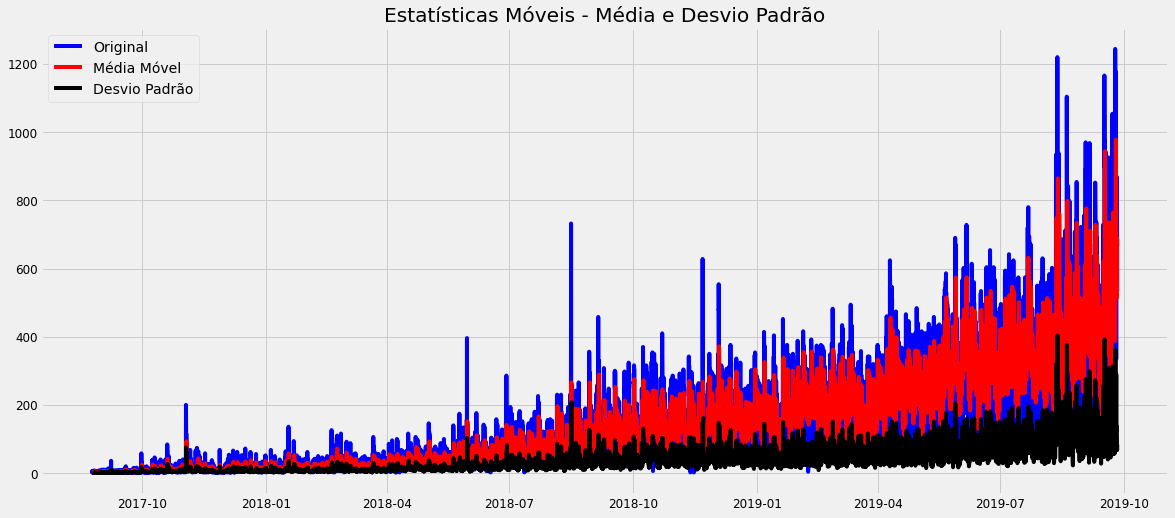


Resultado do Teste Dickey-Fuller:

Estatística do Teste               -4.456561
Valor-p                             0.000235
Número de Lags Consideradas        45.000000
Número de Observações Usadas    18242.000000
Valor Crítico (1%)                 -3.430709
Valor Crítico (5%)                 -2.861698
Valor Crítico (10%)                -2.566854
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [20]:
# Aplica a função 
testa_estacionaridade(dados_treino['Count'])

A série já é estacionária.

Vamos decompor a série e analisar seus componentes em separado.

In [21]:
# Decompondo a série temporal
decomposition = seasonal_decompose(dados_treino['Count'])

In [22]:
# Extraindo cada componente da série
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

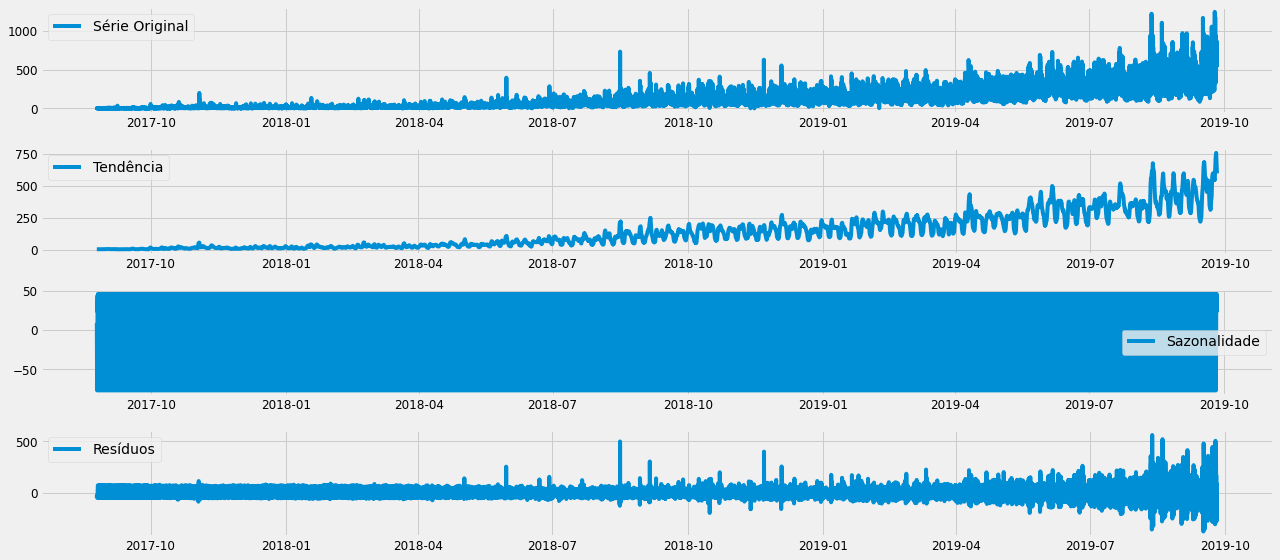

In [23]:
# Plot
plt.subplot(411)
plt.plot(dados_treino['Count'], label = 'Série Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Resíduos')
plt.legend(loc = 'best')
plt.tight_layout()

A série não apresenta sazonalidade, mas percebemos claramente a tendência e algum ruído. 

Dependendo do modelo de previsão usado, a tendência teria que ser removida. Mas como usamos o modelo de suavização exponencial, isso não é necessário, pois esse modelo trata a tendência presente na série, como veremos mais abaixo.

Essa série é aditiva ou multiplicativa? Vamos checar.

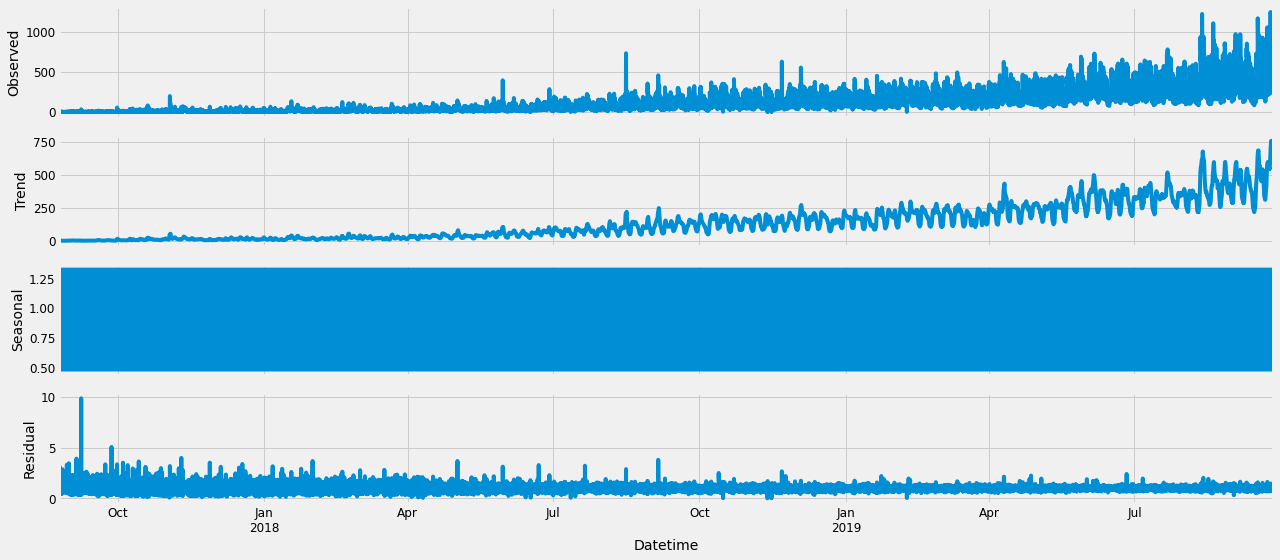

In [24]:
# Decomposição Multiplicativa 
result_mul = seasonal_decompose(dados_treino['Count'], model = 'multiplicative', extrapolate_trend = 'freq')

# Plot
result_mul.plot()
plt.show()

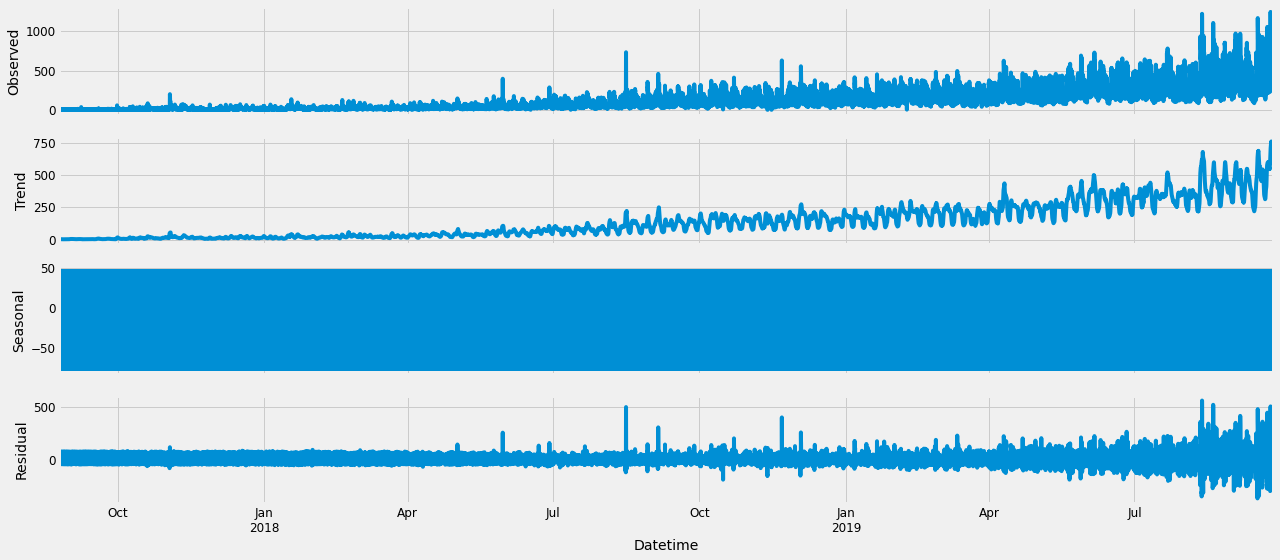

In [25]:
# Decomposição Aditiva
result_add = seasonal_decompose(dados_treino['Count'], model = 'additive', extrapolate_trend = 'freq')

# Plot
result_add.plot()
plt.show()

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série.

Os resíduos não podem ter um padrão. Nesse caso, vemos um leve padrão em ambos os casos. Por hora isso não é relevante e podemos usar uma série ou outra, aditiva ou multiplicativa.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria variável result_mul. Vamos extraí-los e colocá-los em um dataframe.

In [26]:
# Extraindo os Componentes
# Observações = (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis = 1)
df_reconstructed.columns = ['Seasonal', 'Trend', 'Resid', 'Valores_Observados']
df_reconstructed.head()

,Seasonal,Trend,Resid,Valores_Observados
Datetime,,,,
2017-08-25 00:00:00,1.135457,2.618080,2.691140,8
2017-08-25 01:00:00,0.906008,2.642754,0.835298,2
2017-08-25 02:00:00,0.767480,2.667428,2.930836,6
2017-08-25 03:00:00,0.634250,2.692101,1.171327,2
2017-08-25 04:00:00,0.544107,2.716775,1.352982,2


## Pré-Processamento

Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

In [27]:
# Os dados de treino serão divididos em dados de treino e validação.
# Observe que os registros são separados em ordem cronológica.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

## Forecasting - Modelagem Preditiva Para Séries Temporais

### Exponential Smoothing

A suavização exponencial é um método de previsão de séries temporais para dados univariados.

Métodos de séries temporais, como a família de métodos Box-Jenkins ARIMA, desenvolvem um modelo em que a previsão é uma soma linear ponderada de observações ou atrasos (lags) recentes.

Os métodos de previsão de suavização exponencial são semelhantes, pois uma previsão é uma soma ponderada de observações passadas, mas o modelo usa explicitamente um peso decrescente exponencialmente para observações passadas. Especificamente, observações passadas são ponderadas com uma proporção que diminui geometricamente.

As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações envelhecem. Em outras palavras, quanto mais recente a observação, maior o peso associado.

Os métodos de suavização exponencial podem ser considerados uma alternativa à popular classe de métodos Box-Jenkins ARIMA para previsão de séries temporais.

Coletivamente, os métodos às vezes são chamados de modelos ETS, referindo-se à modelagem explícita de Erro, Tendência e Sazonalidade.


**Tipos de Suavização Exponencial**

Existem três tipos principais de métodos de previsão de séries temporais de suavização exponencial:

Um método simples que não assume estrutura sistemática, uma extensão que lida explicitamente com as tendências e a abordagem mais avançada que adiciona suporte à sazonalidade. Vamos definir cada um deles.


**Suavização Exponencial Simples**

Suavização exponencial simples, o SES, é um método de previsão de séries temporais para dados univariados sem tendência ou sazonalidade.

Requer um único parâmetro, chamado alfa (a), também chamado de fator de suavização ou coeficiente de suavização.

Este parâmetro controla a taxa na qual a influência das observações em etapas anteriores decai exponencialmente. Alfa geralmente é definido como um valor entre 0 e 1. Valores grandes significam que o modelo presta atenção principalmente às observações passadas mais recentes, enquanto valores menores significam que mais da história é levada em consideração ao fazer uma previsão.

Um valor próximo a 1 indica aprendizado rápido (ou seja, apenas os valores mais recentes influenciam as previsões), enquanto um valor próximo a 0 indica aprendizado lento (observações anteriores têm uma grande influência nas previsões).


**Suavização Exponencial Dupla**

A suavização exponencial dupla é uma extensão da suavização exponencial que adiciona explicitamente suporte para tendências na série temporal univariada.

Além do parâmetro alfa para controlar o fator de suavização, um fator de suavização adicional é adicionado para controlar a deterioração da influência da mudança na tendência chamada beta (b).

O método suporta tendências que mudam de maneiras diferentes: um aditivo e um multiplicativo, dependendo se a tendência é linear ou exponencial, respectivamente.

A suavização exponencial dupla com uma tendência aditiva é classicamente chamada de modelo de tendência linear de Holt, homenagem ao desenvolvedor do método, Charles Holt.

- Tendência aditiva: Suavização exponencial dupla com uma tendência linear.
- Tendência multiplicativa: Suavização exponencial dupla com uma tendência exponencial.

Para previsões de longo alcance (várias etapas), a tendência pode continuar irrealisticamente. Como tal, pode ser útil diminuir a tendência ao longo do tempo.


**Suavização Exponencial Tripla**

A suavização exponencial tripla é uma extensão da suavização exponencial que adiciona explicitamente suporte à sazonalidade à série temporal univariada.

Às vezes, esse método é chamado de suavização exponencial de Holt-Winters, homenagem aos dois colaboradores do método: Charles Holt e Peter Winters.

Além dos fatores de suavização alfa e beta, é adicionado um novo parâmetro chamado gama (g) que controla a influência no componente sazonal.

Como na tendência, a sazonalidade pode ser modelada como um processo aditivo ou multiplicativo para uma mudança linear ou exponencial na sazonalidade.

- Sazonalidade aditiva: suavização exponencial tripla com uma sazonalidade linear.
- Sazonalidade multiplicativa: Suavização exponencial tripla com uma sazonalidade exponencial.

A suavização exponencial tripla é a variação mais avançada da suavização exponencial e, através da configuração, também pode desenvolver modelos de suavização exponencial dupla e única.

Vamos criar dois modelos de Suavização Exponencial usando o Statsmodels.

In [28]:
# Versão 1 do modelo - Simple Exponential Smoothing
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

# A função SimpleExpSmoothing() recebe os dados de treino no formato de array numpy
# A função fit() faz o treinamento

# O hiperparâmetro smoothing_level define o nível de suavização exponencial na série
# O hiperparâmetro optimized define se teremos ou não otimização 

# Versão 1 do modelo - Simple Exponential Smoothing 
modelo_v1 = SimpleExpSmoothing(np.asarray(df_treino['Count'])).fit(smoothing_level = 0.8, optimized = True) 

In [29]:
# Previsões com o Modelo
df_valid['previsoes_v1'] = modelo_v1.forecast(len(df_valid)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid[['Count', 'previsoes_v1']].head()

,Count,previsoes_v1
Datetime,,
2019-06-25 02:00:00,218,342.564214
2019-06-25 03:00:00,244,342.564214
2019-06-25 04:00:00,168,342.564214
2019-06-25 05:00:00,140,342.564214
2019-06-25 06:00:00,156,342.564214


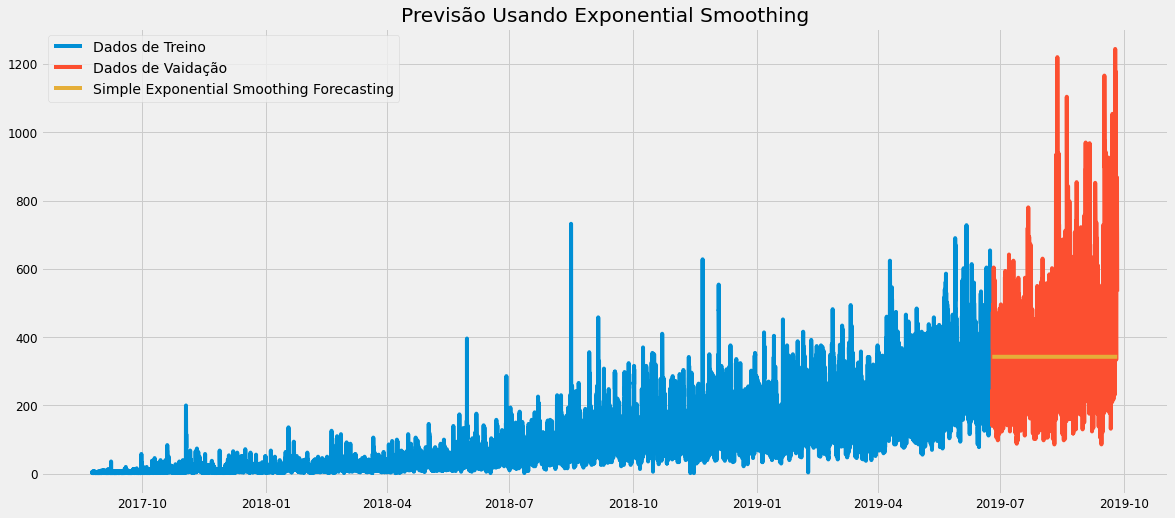

In [31]:
# Plot
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['Count'], label = 'Dados de Treino')
plt.plot(df_valid['Count'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v1'], label = 'Simple Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

Pronto! Temos a previsão da nossa série! Você apresentaria esse modelo ao investidor disposto a investir no seu negócio? Espero que não!

Esse modelo não é muito melhor do que nosso modelo base. Vamos calcular o erro do modelo.

In [42]:
# Define valor real e valor previsto
y_true = df_valid.Count
y_pred = df_valid.previsoes_v1

In [43]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

192.21990001982536


Nosso Modelo Base com o Método Naive obteve um RMSE de 195.06. 

Nosso objetivo é reduzir o RMSE tanto quanto possível, pois essa métrica indica a taxa de erro do modelo. Reduzimos de 195.06 para 192.22. Ou seja, para essa série, um modelo de suavização exponencial simples não é muito melhor do que um modelo ingênuo (naive).

Será que conseguimos melhorar a performance do modelo preditivo? Vamos tentar outro tipo de suavização exponencial.

In [44]:
# Versão 2 do modelo - Double Exponential Smoothing 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

# Observe que estamos usando a função ExponentialSmoothing().
# Ao usar o hiperparâmetro trend, definimos o método Double Exponential Smoothing.
# Ao usar o hiperparâmetro seasonal, definimos o método Triple Exponential Smoothing.

# Vamos usar o Double. Como temos sazonalidade, não faz muito sentido usar o Triple.
# Escolhi a série aditiva
modelo_v2 = ExponentialSmoothing(np.asarray(df_treino['Count']), trend = 'additive').fit(smoothing_level = 0.8, 
                                                                                         optimized = True) 

In [45]:
# Previsões com o Modelo
df_valid['previsoes_v2'] = modelo_v2.forecast(len(df_valid))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid[['Count', 'previsoes_v1', 'previsoes_v2']].head()

,Count,previsoes_v1,previsoes_v2
Datetime,,,
2019-06-25 02:00:00,218,342.564214,342.590402
2019-06-25 03:00:00,244,342.564214,342.611352
2019-06-25 04:00:00,168,342.564214,342.632302
2019-06-25 05:00:00,140,342.564214,342.653252
2019-06-25 06:00:00,156,342.564214,342.674202


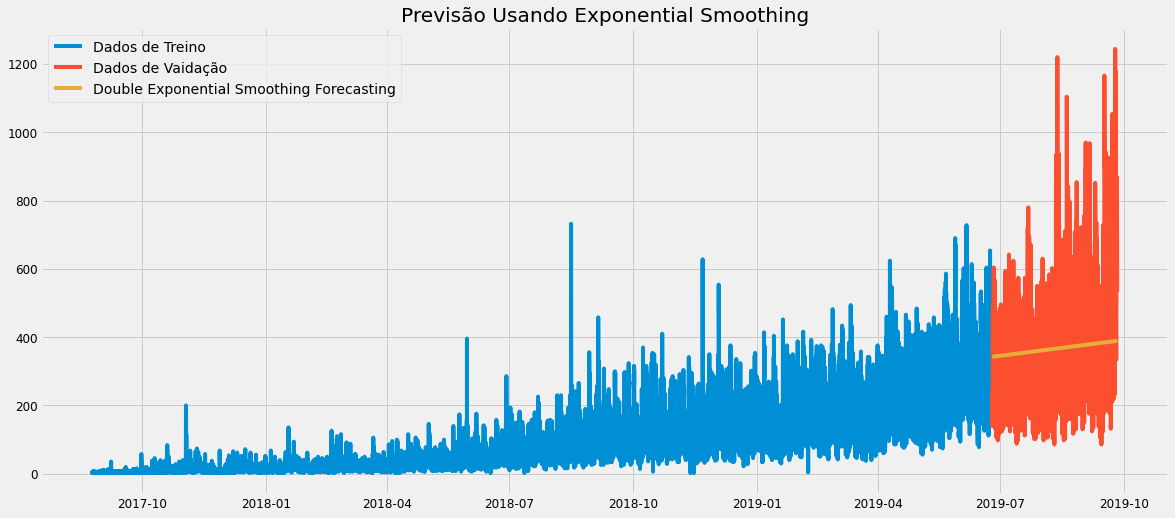

In [47]:
# Plot
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['Count'], label = 'Dados de Treino')
plt.plot(df_valid['Count'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v2'], label = 'Double Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

In [48]:
# Define valor real e valor previsto
y_true = df_valid.Count
y_pred = df_valid.previsoes_v2

In [49]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

184.19576272196684


Opa! Tivemos uma melhora razoável aqui. Observe a linha amarela no gráfico. Ela começou a subir. Nosso objetivo é deixá-la semelhante à linha laranja. Chegaremos lá.

Ainda não usamos os dados de teste, pois esses modelos que estamos estudando até aqui são básicos e temos opções bem mais avançadas que apresentarão resultados bem superiores. E então precisaremos dos dados de teste.

Até a próxima aula.

# Fim